# 1- Importation des librairies

In [1]:
import numpy,pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix
from copy import copy

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 2- Chargement des dataset train

In [2]:
data_train=pandas.read_csv("DataVerse - Data Challenge 2022-2023 - Train.csv")
data_train.head(6)

,Patient_ID,symptome 1,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Profession,Martial_Status,Sex,Age,Country,Smallpox
0,P22833,Swollen Lymph Nodes,True,True,True,True,False,True,False,False,Facilities manager,Single,M,62,Mauritania,1
1,P7988,Swollen Lymph Nodes,True,False,False,False,True,True,True,True,Chartered loss adjuster,Widowed,M,62,Wallis and Futuna,1
2,P12774,Swollen Lymph Nodes,True,False,False,True,True,True,False,False,Chief Financial Officer,Single,F,33,Brunei Darussalam,0
3,P972,Swollen Lymph Nodes,True,True,True,True,False,False,False,True,Database administrator,Divorced,F,46,Turkey,1
4,P23058,Swollen Lymph Nodes,True,True,True,False,True,False,True,True,Theatre director,Divorced,M,19,Namibia,1
5,P9914,Swollen Lymph Nodes,True,True,True,True,True,False,True,True,Nurse learning disability,Married,M,44,Eritrea,1


In [3]:
data_train.shape

(17500, 16)

In [4]:
data_test=pandas.read_csv("DataVerse - Data Challenge 2022-2023 - Test.csv")
data_test.head(6)

,Patient_ID,symptome 1,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Profession,Martial_Status,Sex,Age,Country,trustii_id
0,P7260,Swollen Lymph Nodes,False,False,True,False,True,False,False,False,Financial controller,Widowed,M,35,Mozambique,1
1,P7709,Swollen Lymph Nodes,True,True,True,False,True,False,False,True,Financial adviser,Divorced,F,50,Cayman Islands,2
2,P21132,Fever,True,False,False,True,False,True,True,False,Broadcast presenter,Single,F,33,Saint Kitts and Nevis,3
3,P5800,None,True,False,False,False,False,False,True,True,Armed forces operational officer,Widowed,M,49,Marshall Islands,4
4,P4073,Muscle Aches and Pain,True,True,True,False,True,False,False,False,Public relations account executive,Single,M,50,Brunei Darussalam,5
5,P21653,Fever,True,False,True,True,False,True,True,True,Financial controller,Divorced,M,59,Western Sahara,6


# 3- Séparation colonnes en features utiles et target

## Pour le jeu de Train

In [5]:
#Pour éviter la copie par référence
data_train_=data_train.copy()

#target
y_train=data_train_['Smallpox']

#features
X_train=data_train_.drop(['Patient_ID','Smallpox','Profession'],axis=1)

## Pour le jeu de Test

In [6]:
#Pour éviter la copie par référence
data_test_=data_test.copy()

#features
X_test=data_test_.drop(['Patient_ID','trustii_id','Profession'],axis=1)

# 4- Encodage des colonnes non numériques et mapping des données

## Encodage

In [7]:
from sklearn.preprocessing import OrdinalEncoder

def encoder_Data(features):
    ordinal_encoder = OrdinalEncoder()
    data_cat_encoded = ordinal_encoder.fit_transform(features)
    
    return data_cat_encoded

In [8]:
X_train=encoder_Data(X_train)
X_train

array([[  3.,   1.,   1., ...,   1.,  43., 136.],
       [  3.,   1.,   0., ...,   1.,  43., 238.],
       [  3.,   1.,   0., ...,   0.,  14.,  32.],
       ...,
       [  1.,   0.,   1., ...,   1.,  39., 204.],
       [  3.,   0.,   1., ...,   0.,  23., 194.],
       [  2.,   1.,   0., ...,   0.,  16.,  52.]])

In [9]:
X_test=encoder_Data(X_test)
X_test

array([[  3.,   0.,   0., ...,   1.,  16., 147.],
       [  3.,   1.,   1., ...,   0.,  31.,  40.],
       [  0.,   1.,   0., ...,   0.,  14., 183.],
       ...,
       [  2.,   1.,   1., ...,   0.,  35., 179.],
       [  3.,   0.,   0., ...,   0.,   4., 107.],
       [  3.,   0.,   0., ...,   0.,  30.,  91.]])

# 5- Normalisation

Pour mettre toutes les features à la même échelle , aussi bien dans le train que dans le test

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 6- Spliting

Pour partitionner notre jeu d'entrainement en train set (pour l'entrainement au vrai sens du terme) et validation set

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 7- KNN

In [13]:
#Importation KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

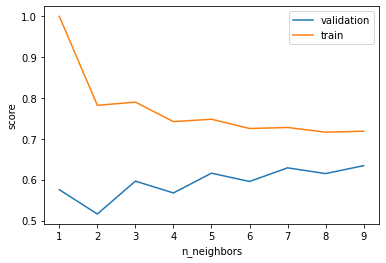

In [14]:
k=np.arange(1,10)
train_score,val_score=validation_curve(KNeighborsClassifier(),X_train,y_train,param_name='n_neighbors',param_range=k)
plt.figure()
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="train")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()
plt.show()


In [15]:
# Use the KNN classifier to fit data
classifier_knn = KNeighborsClassifier(n_neighbors=7)
classifier_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [16]:
# Predict y data with classifier: 
y_predict_knn = classifier_knn.predict(X_val)
y_predict_knn

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
#Score
accuracy_score(y_val, y_predict_knn, normalize=True)

0.6488571428571429

In [18]:
#Number of predictions for each class
predicts_knn = pandas.DataFrame(y_predict_knn)[0].value_counts()
predicts_knn

1    2541
0     959
Name: 0, dtype: int64

# 8- SVM

In [19]:
#Importation SVM
from sklearn import svm

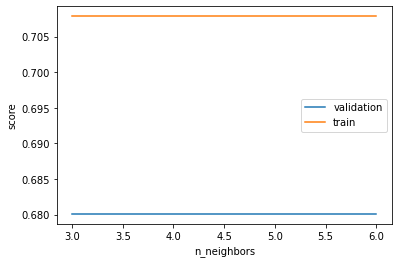

In [20]:
degree=np.arange(3,7)
train_score,val_score=validation_curve(svm.SVC(),X_train,y_train,param_name='degree',param_range=degree)
plt.figure()
plt.plot(degree,val_score.mean(axis=1),label="validation")
plt.plot(degree,train_score.mean(axis=1),label="train")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()
plt.show()


In [21]:
#Use SVM classifier to fit data 
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, y_train)


SVC()

In [22]:
#Predictions
y_predict_svm = classifier_svm.predict(X_val)
y_predict_svm

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
 pandas.DataFrame(y_predict_svm).value_counts

<bound method DataFrame.value_counts of       0
0     1
1     0
2     1
3     1
4     1
...  ..
3495  1
3496  1
3497  0
3498  1
3499  1

[3500 rows x 1 columns]>

In [24]:
#SVM Accuracy
accuracy_score(y_val, y_predict_svm, normalize=True)

0.69

In [25]:
from sklearn.metrics import recall_score,average_precision_score,f1_score,precision_score,roc_auc_score

In [26]:
recall_score(y_val, y_predict_svm)

0.9163716814159292

In [27]:
average_precision_score(y_val, y_predict_svm)

0.6936379346856723

In [28]:
f1_score(y_val, y_predict_svm)

0.7924239525540463

In [29]:
precision_score(y_val, y_predict_svm)

0.6980114593865858

In [30]:
roc_auc_score(y_val, y_predict_svm)

0.5968955181273194

# 9- Prédictions sur le test set

In [31]:
y_predict_test = classifier_svm.predict(X_test)

In [32]:
predicts_test = pandas.DataFrame(y_predict_test)[0].value_counts()

# 10- Exportation des prédictions sur le test set en csv

In [33]:
data = pandas.DataFrame({
    "trustii_id" : data_test["trustii_id"],
    "Smallpox"   : y_predict_test
})

In [34]:
data.to_csv(r'data.csv',index=True)